# Installing Dependencies 

In [1]:
!pip install transformers -q

# Importing Libraries 

In [2]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

# Device 

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Model 

In [4]:
model = VisionEncoderDecoderModel.from_pretrained('nlpconnect/vit-gpt2-image-captioning')
feature_extractor = ViTFeatureExtractor.from_pretrained('nlpconnect/vit-gpt2-image-captioning')
tokenizer = AutoTokenizer.from_pretrained('nlpconnect/vit-gpt2-image-captioning')

E:\Anaconda\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [5]:
max_length = 40
num_beams = 5
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [6]:
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

In [9]:
predict_step(['Drone 2.jpg'])

['a large body of water with sailboats in it']

## Input Image 

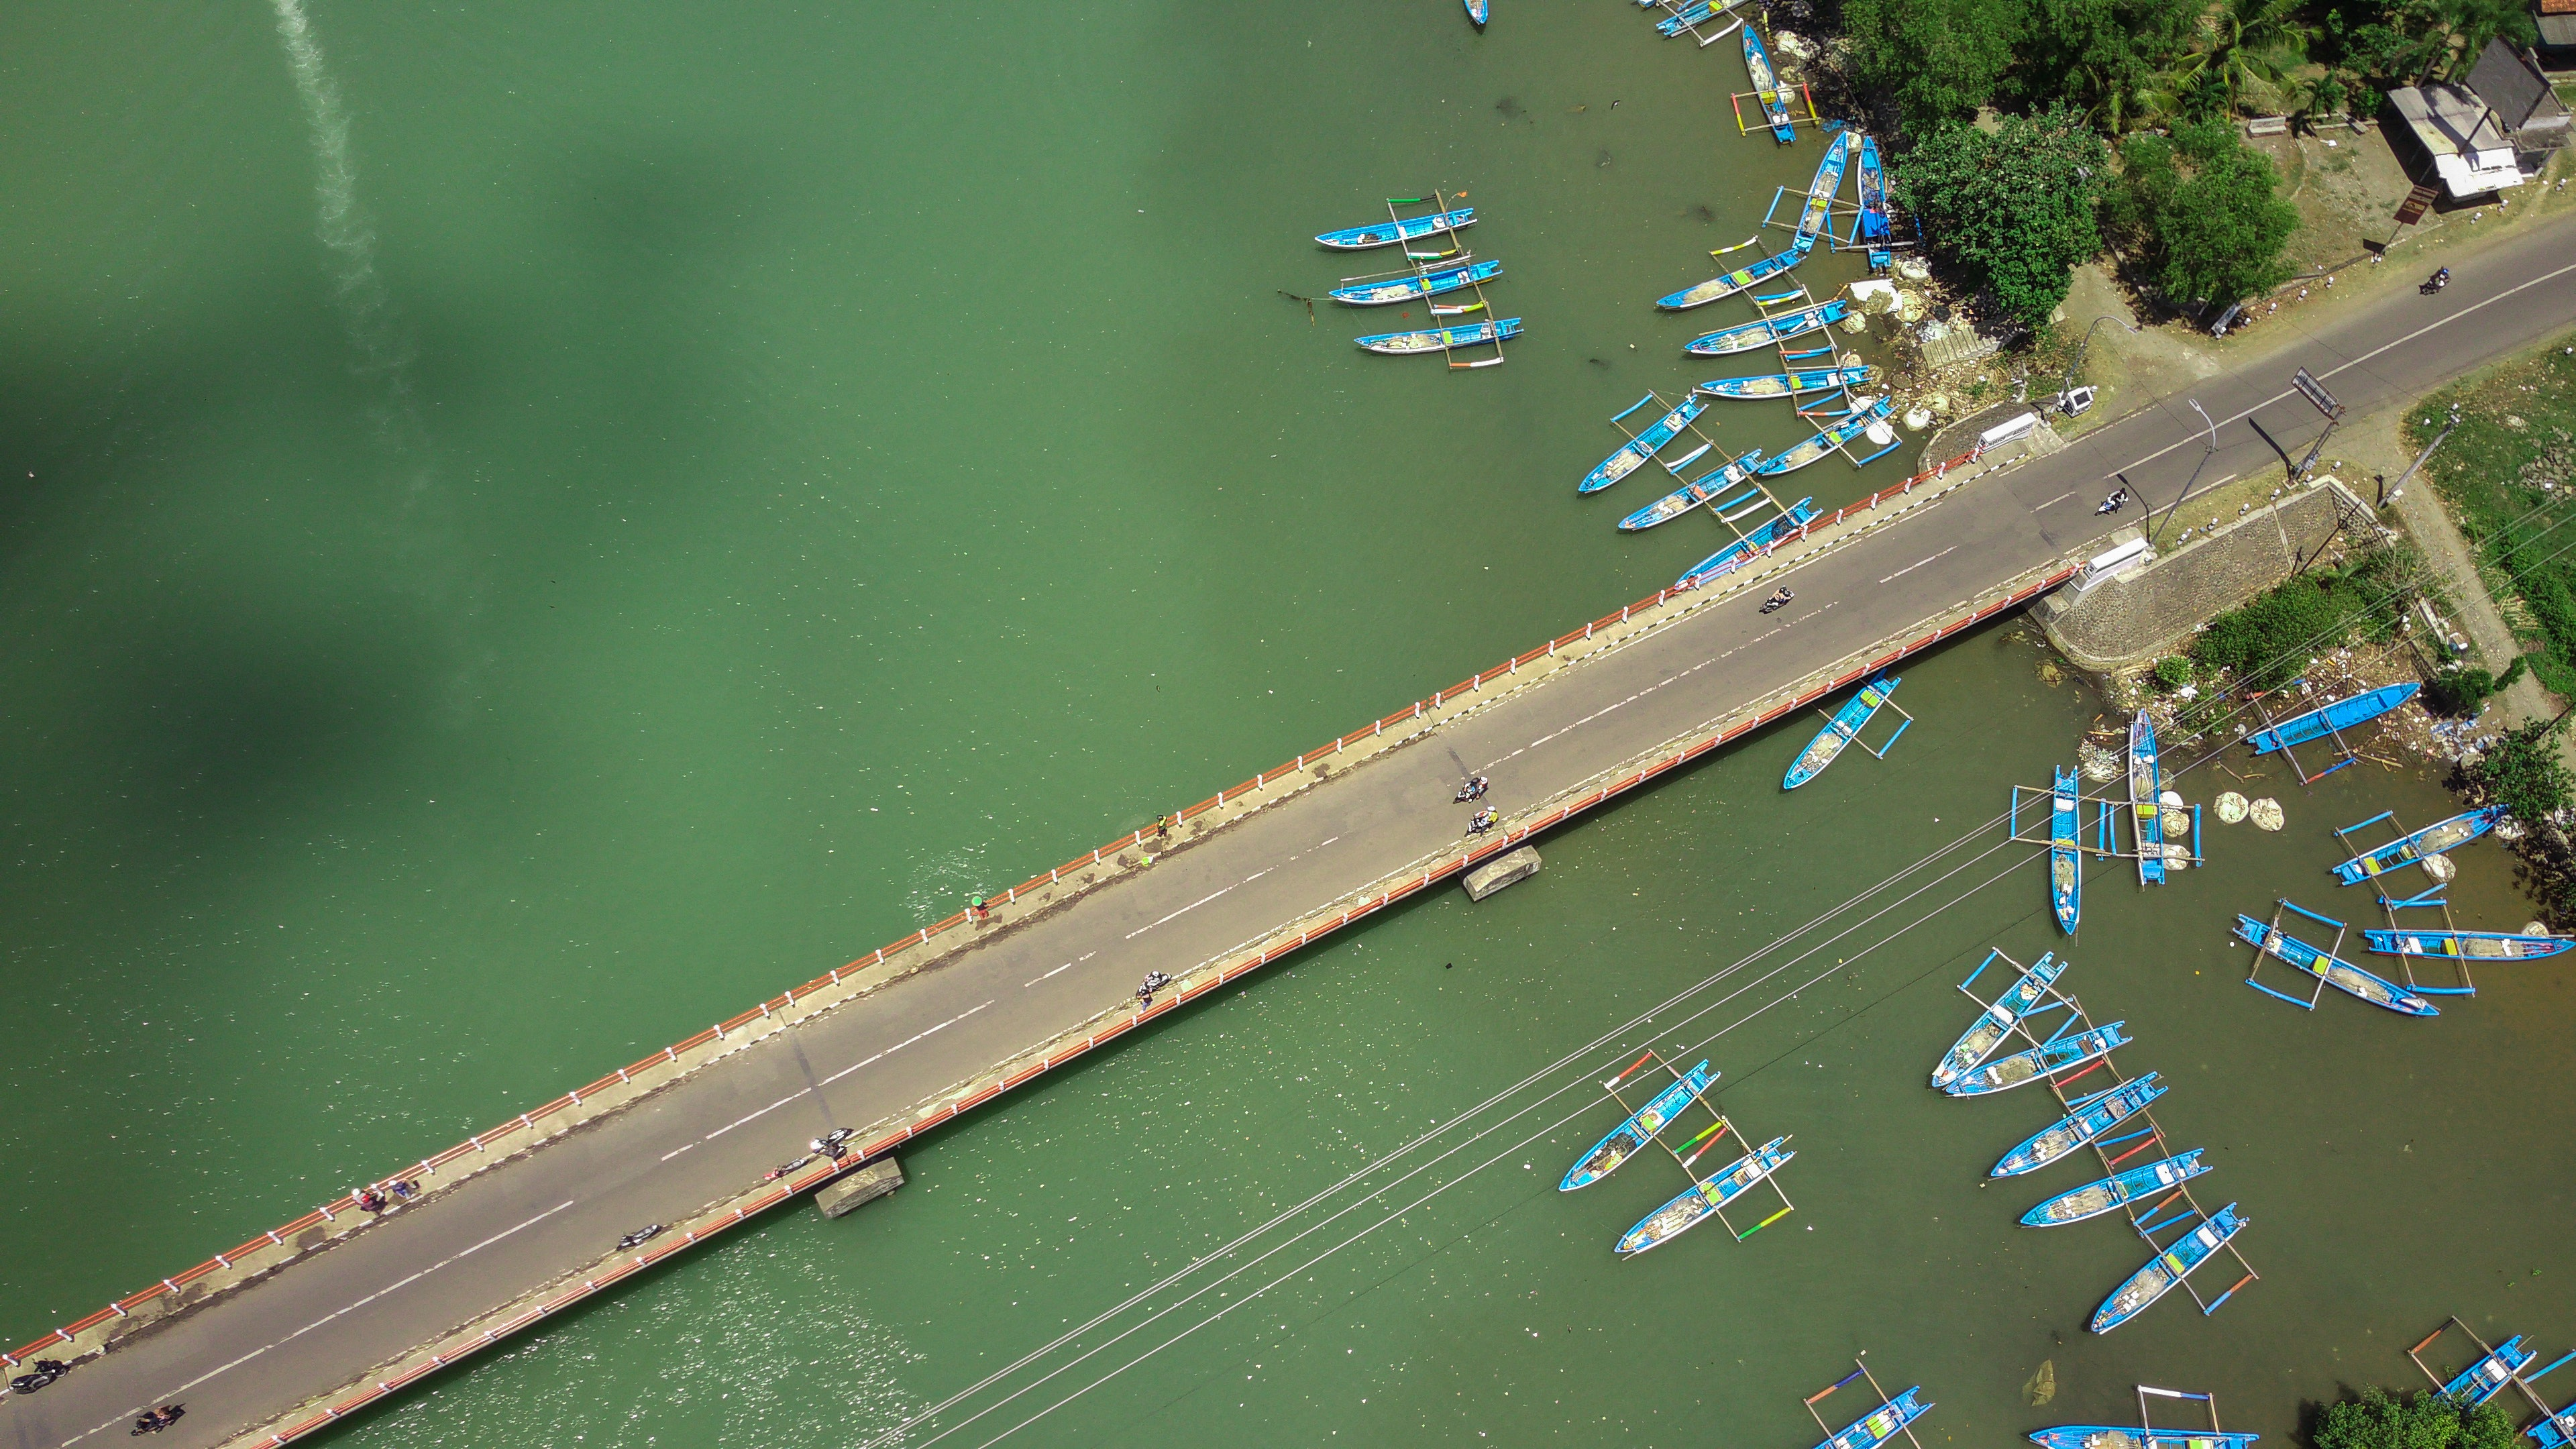

In [10]:
from IPython.display import Image as img
img(filename='Drone 2.jpg')

# Using Transformers Pipeline 

In [ ]:

from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("/content/Drone 2.jpg")

# [{'generated_text': 'a soccer game with a player jumping to catch the ball '}]


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
E:\Anaconda\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
